In [1]:
import pandas as pd
import os
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
data_dir = "/lustre/groups/ml01/workspace/ot_perturbation/data/zebrafish_new/results/allocation"

In [3]:
df = pd.read_csv(os.path.join(data_dir, "same_tp_cf_diff_e_distance_logfoldchanges.csv"), index_col=0)

In [4]:
condition_order = pd.read_csv("/lustre/groups/ml01/workspace/ot_perturbation/data/zebrafish_new/gene_targets_ordered.csv")
condition_order["gene_target"] = condition_order.apply(lambda x: "_".join(x["gene_target"].split("_")[:-1]), axis=1)
gene_target_ordered = list(condition_order.drop_duplicates(["gene_target"]).gene_target)

In [5]:
df.head()

,condition,variable,value,perturbation_effect,cell_type,timepoint,gene_target
0,zc4h2_control_24,e_distance_periderm,3.505519,4.197768,distance_periderm,24,zc4h2_control
1,met_control_36,e_distance_periderm,0.558215,4.881791,distance_periderm,36,met_control
2,tfap2a_control_72,e_distance_periderm,0.390328,6.915538,distance_periderm,72,tfap2a_control
3,hgfa_control_48,e_distance_periderm,-0.983226,5.845730,distance_periderm,48,hgfa_control
4,tfap2a_foxd3_72,e_distance_periderm,2.041890,5.502989,distance_periderm,72,tfap2a_foxd3


In [6]:
df["timepoint"] = df.apply(lambda x: int(x["condition"].split("_")[-1]), axis=1)
df["gene_target"] = df.apply(lambda x: "_".join(x["condition"].split("_")[:-1]), axis=1)

In [8]:
df_conds = df.drop_duplicates(subset="condition")

def get_exp_stage(x):
    gene_target = x["gene_target"]
    same_conds = df_conds[df_conds["gene_target"]==gene_target]["condition"].values
    other_tps = [int(el.split("_")[-1]) for el in same_conds]
    earlier_tps = [el for el in other_tps if el<x["timepoint"]]
    later_tps = [el for el in other_tps if el>x["timepoint"]]
    if not len(earlier_tps):
        return "earliest"
    if not len(later_tps):
        return "latest"
    return "middle"
    
    
    

df["exp_stage"] = df.apply(get_exp_stage, axis=1)

In [9]:
df_conds["exp_stage"] = df_conds.apply(get_exp_stage, axis=1)

/tmp/ipykernel_1432488/1515055532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_conds["exp_stage"] = df_conds.apply(get_exp_stage, axis=1)


In [10]:
df_conds["exp_stage"].value_counts()

exp_stage
middle      25
earliest    23
latest      23
Name: count, dtype: int64

/tmp/ipykernel_1432488/726831303.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


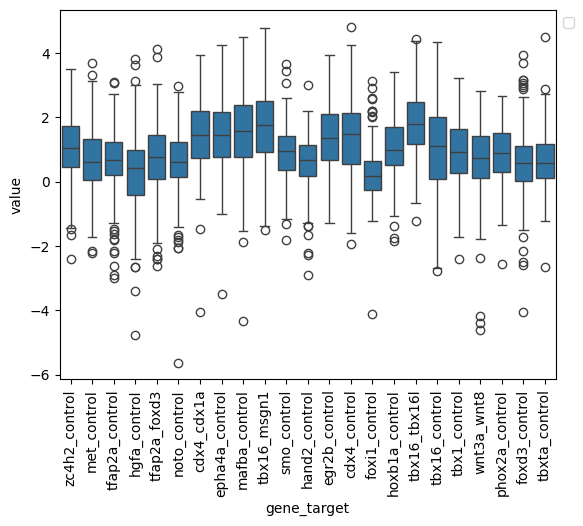

In [11]:

sns.boxplot(data=df, x="gene_target", y="value")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=90)
plt.show()

/tmp/ipykernel_1432488/828469819.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


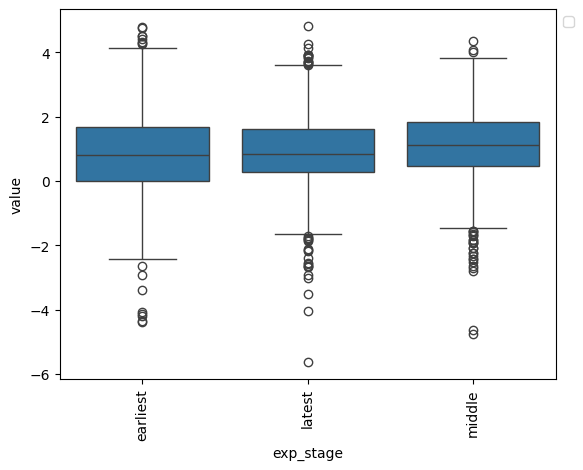

In [12]:

sns.boxplot(data=df, x="exp_stage", y="value")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=90)
plt.show()

/tmp/ipykernel_1432488/1161724860.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


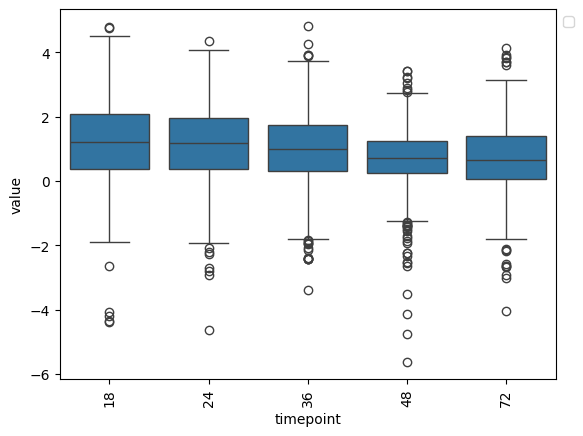

In [13]:

sns.boxplot(data=df, x="timepoint", y="value")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=90)
plt.show()

In [14]:
import numpy as np
finite_values = df["perturbation_effect"].replace([np.inf, -np.inf], np.nan).dropna()

df["perturbation_quantile"] = pd.qcut(df["perturbation_effect"], 
                                      q=5, 
                                      labels=["Q1", "Q2", "Q3", "Q4", "Q5"])

df.loc[~df["perturbation_effect"].replace([np.inf, -np.inf], np.nan).notna(), "perturbation_quantile"] = np.nan

In [15]:
df.to_csv(os.path.join(data_dir, "same_tp_cf_diff_e_distance_aggregated.csv"))

/tmp/ipykernel_1432488/2067095494.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


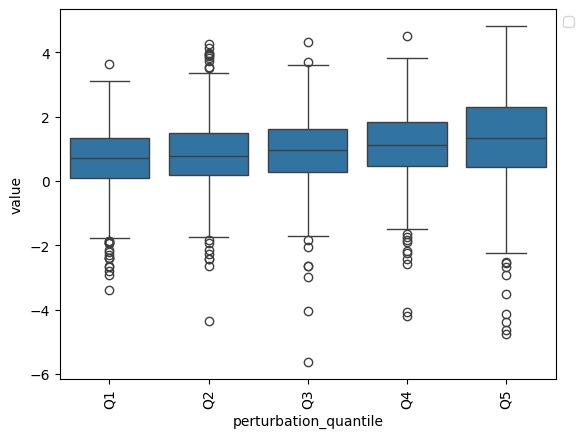

In [17]:

sns.boxplot(data=df, x="perturbation_quantile", y="value")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=90)
plt.show()